# Data Mining Assignment: Classification Modelling
Nina Kumagai (19389905)

# Part I (Data Preprocessing)

## 1.0 Exploratory Data Analysis (EDA):

In [844]:
import warnings
warnings.filterwarnings('ignore')

In [845]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import normalize, PowerTransformer
from sklearn.model_selection import train_test_split


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import arff

In [846]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [847]:
df = pd.read_csv("data2019.student.csv")

In [848]:
df.head()

,ID,Class,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30
0,1,1.0,V2,V6,V2,V2,V1,V2,V2,V2,D,A,C,C,NaN,T,0,1,1,5,NaN,3,1271,137395,1,5,3449.0,1,4,74.0,1,1
1,2,0.0,V2,V1,V2,V1,V4,V3,V3,V2,A,A,C,A,NaN,T,1,1,1,45,NaN,16,1253,135433,1,45,1846.0,4,4,23.0,1,1
2,3,0.0,V4,V6,V2,V0,V1,V3,V2,V4,B,C,C,B,NaN,T,1,1,1,24,NaN,11,1872,59499,1,24,1936.0,4,4,31.0,2,1
3,4,1.0,V2,V2,V1,V0,V1,V2,V2,V2,D,A,C,A,NaN,T,0,1,1,9,NaN,16,450,170910,1,9,3833.0,1,4,64.0,1,1
4,5,1.0,V2,V5,V1,V1,V3,V3,V2,V2,D,A,C,C,NaN,T,0,1,1,21,NaN,10,792,119515,1,21,5249.0,1,3,26.0,1,1


In [849]:
#df.tail()

In [850]:
print(df.describe())

                ID        Class        att15        att16   att17        att18      att19        att20        att21          att22        att23        att24         att25        att26        att27        att28        att29        att30
count  1100.000000  1000.000000  1100.000000  1100.000000  1100.0  1100.000000  66.000000  1100.000000  1100.000000    1100.000000  1100.000000  1100.000000   1097.000000  1100.000000  1100.000000  1094.000000  1100.000000  1100.000000
mean    550.500000     0.730000     0.410000     1.036364     1.0    20.870909  44.484848    10.040000   990.953636  101452.708182     1.161818    20.870909   3281.881495     2.950000     2.845455    35.701097     1.399091     1.153636
std     317.686953     0.444182     0.492057     0.187278     0.0    12.139456  29.184950     4.100006   403.983358   39973.376294     0.368451    12.139456   2834.562663     1.124728     1.105749    11.446333     0.573766     0.491081
min       1.000000     0.000000     0.000000     1.00000

In [851]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 32 columns):
ID       1100 non-null int64
Class    1000 non-null float64
att1     1100 non-null object
att2     1100 non-null object
att3     1096 non-null object
att4     1100 non-null object
att5     1100 non-null object
att6     1100 non-null object
att7     1100 non-null object
att8     1100 non-null object
att9     1095 non-null object
att10    1100 non-null object
att11    1100 non-null object
att12    1100 non-null object
att13    72 non-null object
att14    1100 non-null object
att15    1100 non-null int64
att16    1100 non-null int64
att17    1100 non-null int64
att18    1100 non-null int64
att19    66 non-null float64
att20    1100 non-null int64
att21    1100 non-null int64
att22    1100 non-null int64
att23    1100 non-null int64
att24    1100 non-null int64
att25    1097 non-null float64
att26    1100 non-null int64
att27    1100 non-null int64
att28    1094 non-null float64
att29

In [852]:
df.columns

Index(['ID', 'Class', 'att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9', 'att10', 'att11', 'att12', 'att13', 'att14', 'att15', 'att16', 'att17', 'att18', 'att19', 'att20', 'att21', 'att22', 'att23', 'att24', 'att25', 'att26', 'att27', 'att28', 'att29', 'att30'], dtype='object')

In [853]:
df.shape

(1100, 32)

In [854]:
#df.plot()

As can be seen, values are not in the same ballpark.

In [855]:
# import seaborn as sns; sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(df, hue="Class")
# g

In [856]:
#df.hist(figsize=(10,5))

Class
0.0    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
1.0    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
dtype: object

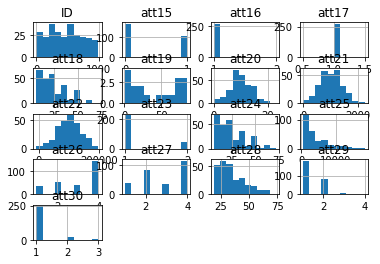

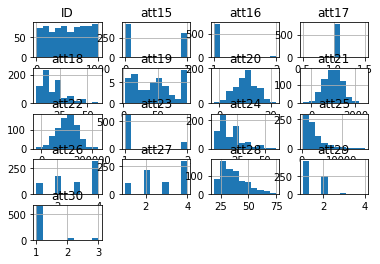

In [857]:
df.groupby('Class').hist()

In [858]:
df.index

RangeIndex(start=0, stop=1100, step=1)

# 2.0 Data Preparation

## 2.1 Irrelevant Attributes


### Which Attributes are Irrelevant in Our Dataset?
att14 and att17 is irrelevant because whether it is included in the analysis or not will not make a difference. This is because att14 and att17 both have the same response for every instance (as shown below) and thus will not make a difference to the classification model.



In [859]:
# for col in list(df):
#     print(col)
#     print(df[col].unique())

In [860]:
df.att17.unique()

array([1])

In [861]:
df.att14.unique()

array(['T'], dtype=object)

In [862]:
# Let's remove these irrelevant attributes now:
del df['att14']
del df['att17']

In [863]:
df.columns
# Can confirm that att14 and att17 have been deleted as they do not appear in this list.

Index(['ID', 'Class', 'att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9', 'att10', 'att11', 'att12', 'att13', 'att15', 'att16', 'att18', 'att19', 'att20', 'att21', 'att22', 'att23', 'att24', 'att25', 'att26', 'att27', 'att28', 'att29', 'att30'], dtype='object')

## 2.2 Missing Values:


In [864]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [865]:
# Missing Entries
df.isnull().sum()

ID          0
Class     100
att1        0
att2        0
att3        4
att4        0
att5        0
att6        0
att7        0
att8        0
att9        5
att10       0
att11       0
att12       0
att13    1028
att15       0
att16       0
att18       0
att19    1034
att20       0
att21       0
att22       0
att23       0
att24       0
att25       3
att26       0
att27       0
att28       6
att29       0
att30       0
dtype: int64

### Which attributes have missing values?
Attributes which have missing values include att3, att9, att25, att28, att13 and att19. 

### For those attributes/instances, how many missing entries are present?
It appears that there are 100 missing values in the attribute Class as expected. There are 4, 5, 3 and 6 missing values in att3, att9, att25 and att28 respectively. There are a large number of missing values in att13 and att19 with 1028 and 1034 missing values respectively.  

### For each attribute/instance with missing entries, make a suitable decision, justify it, and proceed.

#### Small Number of Missing Data:
##### att3: 
This is a categorical data column and there are only four missing values. Thus we will impute the values with the most frequent occuring category for this attribute.
##### att9: 
Same as att3 since att9 is also a categorical data column with only 5 missing values.
##### att25: 
This is a numerical data column and there are only 3 missing values. In order to fix this, the average values of the available data in att25 will be calculated and this average will be recorded in the three missing points.
##### att28: 
Same as att25 since att28 is also numerical in nature and has only 6 missing values.

#### Large Number of Missing Data:
##### att13: 
Categorical in nature. Remove the column as there are far too many missing values in order for us to impute or accept the missing values.
##### att19: 
Numerical in nature. Remove the column as there are far too many missing values in order for us to impute or accept the missing values.

In [866]:
# Impute missing values with the mode of that column (mode is most frequently occuring value)
df['att3'].fillna(df['att3'].mode()[0], inplace=True)

In [867]:
# Check if imputation worked by counting number of missing values again:
# train_df.isnull().sum()

In [868]:
# att9
# Impute missing values with the mode of that column (mode is most frequently occuring value)
df['att9'].fillna(df['att9'].mode()[0], inplace=True)
# Check if imputation worked by counting number of missing values again:
# train_df.isnull().sum()

In [869]:
# att25
# Impute missing values with the mean of column
df['att25'].fillna(df['att25'].mean(), inplace=True)
# Check if imputation worked by counting number of missing values again:
# train_df.isnull().sum()

In [870]:
# att28
# Impute missing values with the mean of column
df['att28'].fillna(df['att28'].mean(), inplace=True)
# Check if imputation worked by counting number of missing values again:
# train_df.isnull().sum()

In [871]:
# Now delete att13 and att19
del df['att13']
del df['att19']
df.isnull().sum()

ID         0
Class    100
att1       0
att2       0
att3       0
att4       0
att5       0
att6       0
att7       0
att8       0
att9       0
att10      0
att11      0
att12      0
att15      0
att16      0
att18      0
att20      0
att21      0
att22      0
att23      0
att24      0
att25      0
att26      0
att27      0
att28      0
att29      0
att30      0
dtype: int64

## 2.3 Duplicates


### Detect if there are any duplicates (instances/attributes) in the original data?
From simple observation we can confirm there are attribute duplicates. More in-depth check done below...

### For each attribute/instance with duplicates, make a suitable decision, justify it, and proceed.

In [872]:
# Check for row duplicates:
len(df)

1100

In [873]:
# dropping duplicate values 
df.drop_duplicates(keep=False,inplace=True) 
  
# length after removing duplicates 
len(df) 

# Thus there were no duplicate rows!

1100

In [874]:
# Duplicate columns?

def getDuplicateColumns(df):
    '''Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.'''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [875]:
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(df)
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows
Column name :  att24
Column name :  att8


In [876]:
# Delete duplicate columns
df = df.drop(columns=getDuplicateColumns(df))
# print("Modified Dataframe", train_df, sep='\n')

## Eliminate Redundant Columns

In [877]:
# Remove ID as it does not give us any information.
del df['ID']
# Do not delete yet as we need it for feature engineering * Now we don't *

In [878]:
#df.head()

## Multicollinearity

In [879]:
df_numeric = df[['att18', 'att20', 'att21', 'att22', 'att25', 'att28']]

In [880]:
df_numeric.head()

,att18,att20,att21,att22,att25,att28
0,5,3,1271,137395,3449.0,74.0
1,45,16,1253,135433,1846.0,23.0
2,24,11,1872,59499,1936.0,31.0
3,9,16,450,170910,3833.0,64.0
4,21,10,792,119515,5249.0,26.0


In [881]:
df_numeric = df._get_numeric_data()

In [882]:
#df_numeric.head()

In [883]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [884]:
%%capture
#gather features
features = "+".join(df_numeric.columns)

# get y and X dataframes based on this regression:
y, X = dmatrices('Class ~' + features, df_numeric, return_type='dataframe')

In [885]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [886]:
vif.round(1)

,VIF Factor,features
0,100.8,Intercept
1,1.1,Class
2,1.1,att15
3,1.1,att16
4,2.0,att18
5,1.0,att20
6,1.0,att21
7,1.0,att22
8,1.0,att23
9,2.2,att25


All the VIF factors are below 5 so there exists no multicollinearlity.

## 2.4 Data type:

### For each attribute, carefully examine the default data type (e.g. Numeric, Nominal, Binary, String, etc.) that has been decided when Weka loads the original CSV file.



In [887]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 25 columns):
Class    1000 non-null float64
att1     1100 non-null object
att2     1100 non-null object
att3     1100 non-null object
att4     1100 non-null object
att5     1100 non-null object
att6     1100 non-null object
att7     1100 non-null object
att9     1100 non-null object
att10    1100 non-null object
att11    1100 non-null object
att12    1100 non-null object
att15    1100 non-null int64
att16    1100 non-null int64
att18    1100 non-null int64
att20    1100 non-null int64
att21    1100 non-null int64
att22    1100 non-null int64
att23    1100 non-null int64
att25    1100 non-null float64
att26    1100 non-null int64
att27    1100 non-null int64
att28    1100 non-null float64
att29    1100 non-null int64
att30    1100 non-null int64
dtypes: float64(3), int64(11), object(11)
memory usage: 223.4+ KB


In [888]:
# Or we can also call dtypes.
df.dtypes

Class    float64
att1      object
att2      object
att3      object
att4      object
att5      object
att6      object
att7      object
att9      object
att10     object
att11     object
att12     object
att15      int64
att16      int64
att18      int64
att20      int64
att21      int64
att22      int64
att23      int64
att25    float64
att26      int64
att27      int64
att28    float64
att29      int64
att30      int64
dtype: object

In [889]:
# for col in list(df):
#     print(col)
#     print(df[col].unique())

### If the data type of an attribute is not suitable, give a brief explanation and convert the attribute to a more suitable data type. Provide detailed information of the conversion.

In [890]:
# #### Let's try to reclassify according to the output above:

# Note that object is a string in pandas, float64 is a decimal value, int64 is an integer.
# Note that categorical = nominal

# Attribute    Current     Reclassified 
# ID           int64       categorical
# Class       float64      categorical   (binary) 1 or 0  
# att1         object      categorical
# att2         object      categorical
# att3         object      categorical
# att4         object      categorical
# att5         object      categorical
# att6         object      categorical
# att7         object      categorical
# att9         object      categorical
# att10        object      categorical
# att11        object      categorical
# att12        object      categorical
# att15         int64      categorical (binary)   1 or 0 
# att16         int64      categorical (binary)   1 or 2 
# att18         int64      numerical
# att20         int64      numerical
# att21         int64      numerical
# att22         int64      numerical
# att23         int64      categorical (binary)   1 or 2  
# att25       float64      numerical - int64
# att26         int64      categorical    1,4,3,2 
# att27         int64      categorical    4,3,2,1
# att28       float64      numerical - int64
# att29         int64      categorical    1,2,3,4
# att30         int64      categorical    1,2,3


In [891]:
categ_list = ['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 
              'att9', 'att10', 'att11', 'att12']
#omitted class, att15, att16, att23 as it is 1,0 binary and att26, att27, att29, att30 as they are also numerical.
# Note that att1 to 12 contain alphabets so making category first and making dummy variables are required.

### Let's use pandas dummy to produce new columns for the same column and make sure all categorical columns are numerical in nature (but not in a continuous hierarchial nature).


In [892]:
#df.head()

In [893]:
for col in categ_list:
    df[col] = df[col].astype('category')

In [894]:
# for col in numerical_list:
#     train_df[col] = train_df[col].astype('int64')

In [895]:
# Now change class back to categ once it is int and not float.


In [896]:
df.dtypes

Class     float64
att1     category
att2     category
att3     category
att4     category
att5     category
att6     category
att7     category
att9     category
att10    category
att11    category
att12    category
att15       int64
att16       int64
att18       int64
att20       int64
att21       int64
att22       int64
att23       int64
att25     float64
att26       int64
att27       int64
att28     float64
att29       int64
att30       int64
dtype: object

In [897]:
# train_df = pd.get_dummies(train_df, columns=[categ_list])
df = pd.get_dummies(df)

In [898]:
#df.head()

In [899]:
df['Class'] = df['Class'].astype('category')
df['att15'] = df['att15'].astype('category')
df['att16'] = df['att16'].astype('category')
df['att23'] = df['att23'].astype('category')

# att26, att27, att29, att30
df['att26'] = df['att26'].astype('category')
df['att27'] = df['att27'].astype('category')
df['att29'] = df['att29'].astype('category')
df['att30'] = df['att30'].astype('category')

In [900]:
df.dtypes

Class       category
att15       category
att16       category
att18          int64
att20          int64
att21          int64
att22          int64
att23       category
att25        float64
att26       category
att27       category
att28        float64
att29       category
att30       category
att1_V0        uint8
att1_V1        uint8
att1_V2        uint8
att1_V3        uint8
att1_V4        uint8
att2_V1        uint8
att2_V10       uint8
att2_V2        uint8
att2_V3        uint8
att2_V4        uint8
att2_V5        uint8
att2_V6        uint8
att2_V7        uint8
att2_V8        uint8
att2_V9        uint8
att3_V1        uint8
att3_V2        uint8
att3_V3        uint8
att3_V4        uint8
att3_V5        uint8
att4_V0        uint8
att4_V1        uint8
att4_V2        uint8
att4_V3        uint8
att4_V4        uint8
att5_V1        uint8
att5_V2        uint8
att5_V3        uint8
att5_V4        uint8
att6_V1        uint8
att6_V2        uint8
att6_V3        uint8
att6_V4        uint8
att7_V1      

## Log Transformation

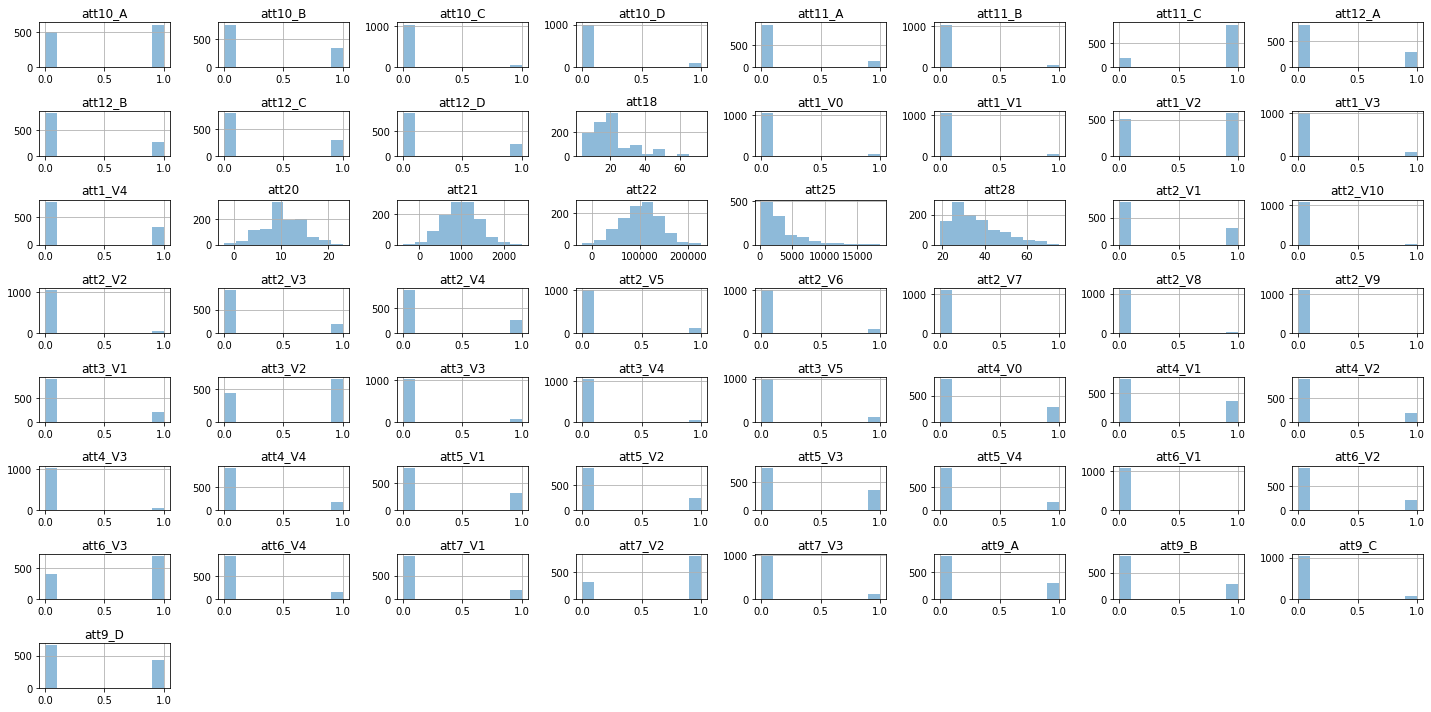

In [901]:
df.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

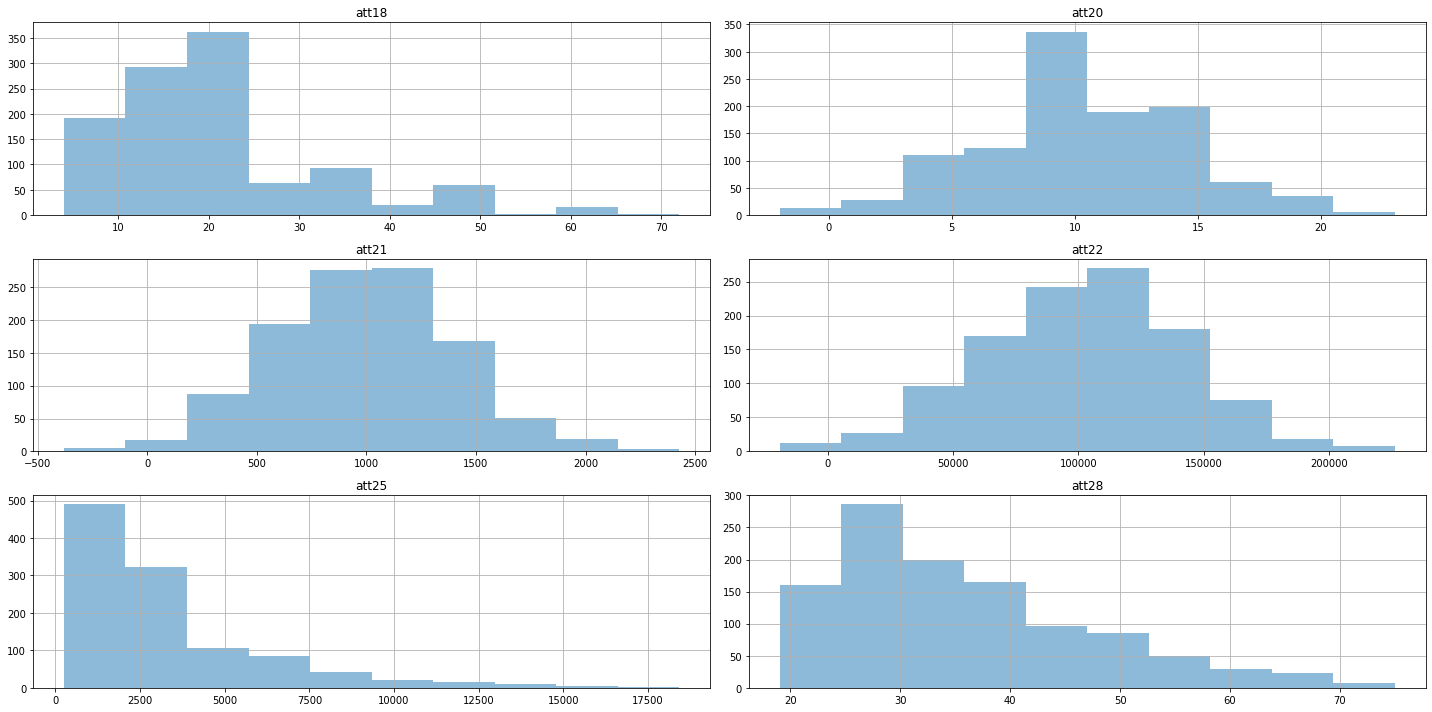

In [902]:
numerical_list = ['att18', 'att20', 'att21', 'att22', 'att25', 'att28']

df.hist(alpha=0.5, figsize=(20, 10), column=numerical_list)
plt.tight_layout()
plt.show()

Looks like there are no outliers.

In [903]:
# Let us perform log transformation on the data first.
# att18, 25 and 28 require a log transformation as it is skewed to the right!
df["att18"] = df["att18"].apply(np.log)
df["att25"] = df["att25"].apply(np.log)
df["att28"] = df["att28"].apply(np.log)

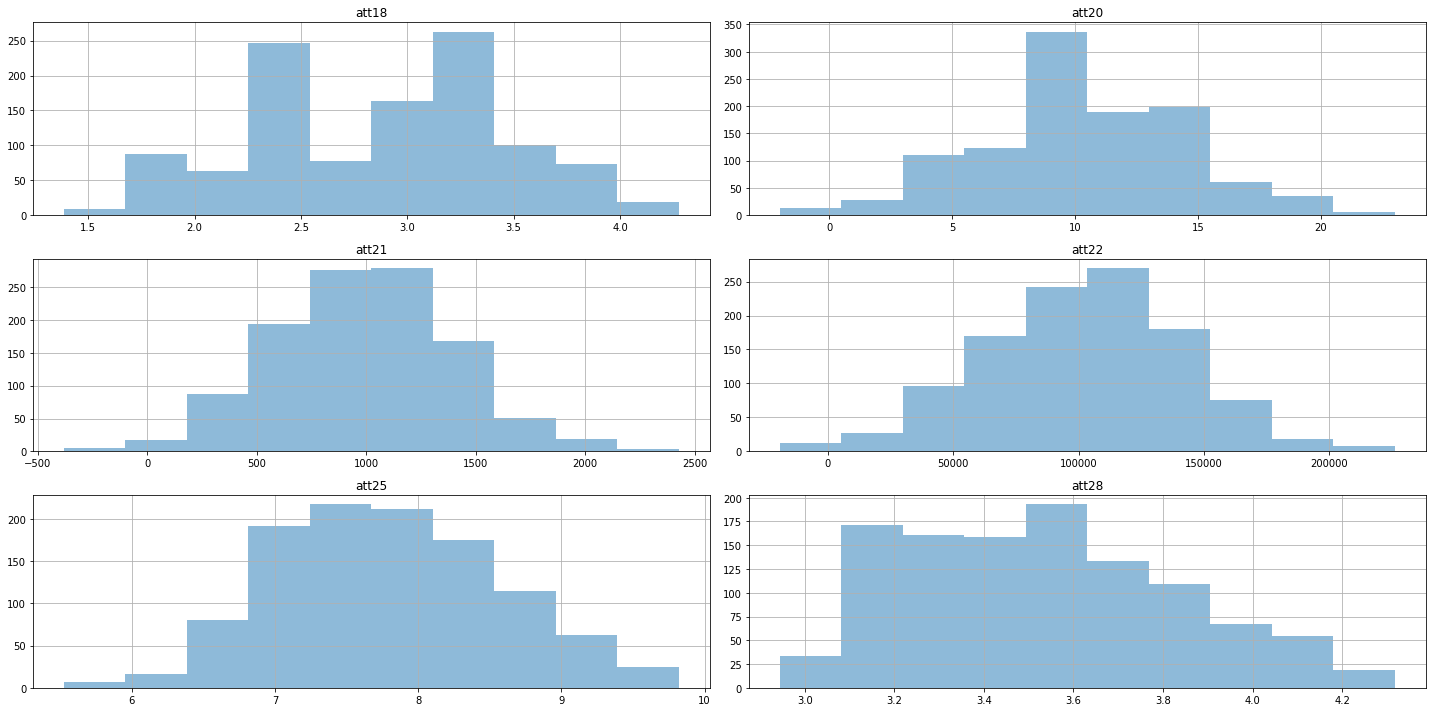

In [904]:
df.hist(alpha=0.5, figsize=(20, 10), column=numerical_list)
plt.tight_layout()
plt.show()
# As can be seen, the values are standardised now with a mean of 0 and standard deviation of 1.

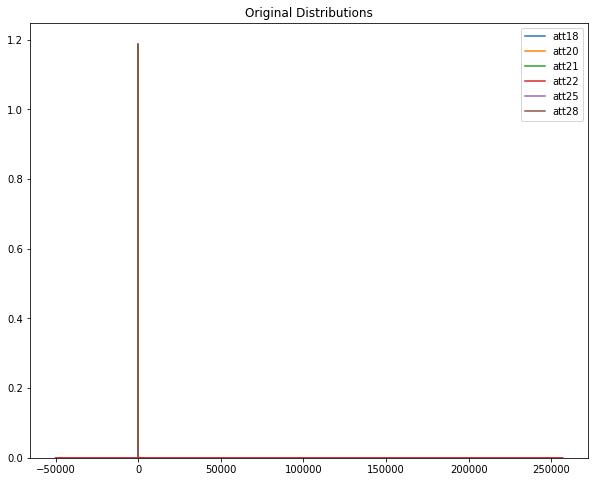

In [905]:
# plot original distribution plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(df['att18'], ax=ax1)
sns.kdeplot(df['att20'], ax=ax1)
sns.kdeplot(df['att21'], ax=ax1)
sns.kdeplot(df['att22'], ax=ax1)
sns.kdeplot(df['att25'], ax=ax1)
sns.kdeplot(df['att28'], ax=ax1);

## Splitting the Dataset

Training, Validation and Test. The last 100 rows are test. 
The remaining dataset will be split 80% into training and 20% into validation (Cross validation will be implemented later when we repeat the sampling so we will only split training and test set here).

In [906]:
train_valid_df = df.iloc[:1000,]
test_df = df.iloc[1000:,]

### For each numeric attribute, decide if any pre-processing (e.g. scaling, standardisation) is required. Give a brief explanation why it is needed (this should be discussed in relation to the subsequent classification task).

In [907]:
print(len(train_valid_df))
print(len(test_df))

1000
100


## 2.5 Scaling and standardisation:

### For each numeric attribute, decide if any pre-processing (e.g. scaling, standardisation) is required. Give a brief explanation why it is needed (this should be discussed in relation to the subsequent classification task).

In [908]:
# Did not work
# scaler = preprocessing.MinMaxScaler()
# df[numerical_list] = scaler.fit_transform(df[numerical_list])

In [909]:
# Did not work
# std_scale = preprocessing.StandardScaler().fit(df[numerical_list])
# df_std = std_scale.transform(df[numerical_list])

# minmax_scale = preprocessing.MinMaxScaler().fit(df[numerical_list])
# df_minmax = minmax_scale.transform(df[numerical_list])
#df_std.head()

In [910]:
numerical_list = ['att18', 'att20', 'att21', 'att22', 'att25', 'att28']

In [911]:
np.mean(train_valid_df.loc[:,numerical_list])

att18         2.873078
att20        10.098000
att21       995.982000
att22    101306.617000
att25         7.798873
att28         3.540224
dtype: float64

In [912]:
np.mean(test_df.loc[:,numerical_list])

att18         2.874733
att20         9.460000
att21       940.670000
att22    102913.620000
att25         7.717873
att28         3.410765
dtype: float64

In [913]:
# Means are similar, so use mean of training and apply to validation when standardising as more datapoints.

In [914]:
# Let us first standardise the numerical columns
# scaler = preprocessing.MinMaxScaler()  # we did not use min max scaler as we wanted centre to be 0.

# Mean is different, mean from the test for the standardisation of the test.
# Mean is consistent, use the mean from the training or the mean from the whole group of the dataset. 

scaler = preprocessing.StandardScaler()

train_valid_df.loc[:,numerical_list] = scaler.fit_transform(train_valid_df.loc[:,numerical_list].to_numpy())

# Use transform, not fit_transform to ensure it is same distribution as original
test_df.loc[:,numerical_list] = scaler.transform(test_df.loc[:,numerical_list].to_numpy())

#train_valid_df.head()

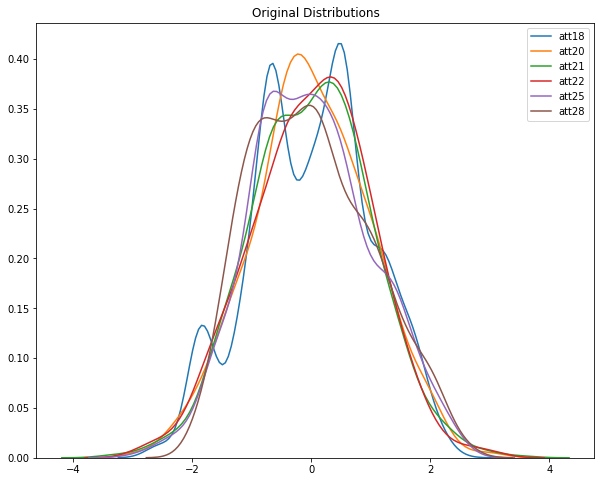

In [915]:
# plot original distribution plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(train_valid_df['att18'], ax=ax1)
sns.kdeplot(train_valid_df['att20'], ax=ax1)
sns.kdeplot(train_valid_df['att21'], ax=ax1)
sns.kdeplot(train_valid_df['att22'], ax=ax1)
sns.kdeplot(train_valid_df['att25'], ax=ax1)
sns.kdeplot(train_valid_df['att28'], ax=ax1);

# Normalisation

In [916]:
# Let us now normalise the numerical columns
#normalise = preprocessing.normalize()
# train_df[numerical_list] = preprocessing.normalize(train_df[numerical_list].to_numpy())
# valid_df[numerical_list] = preprocessing.normalize(valid_df[numerical_list].to_numpy())
# test_df[numerical_list] = preprocessing.normalize(test_df[numerical_list].to_numpy())


In [917]:
# # plot original distribution plot
# fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
# ax1.set_title('Original Distributions')

# sns.kdeplot(train_df['att18'], ax=ax1)
# sns.kdeplot(train_df['att20'], ax=ax1)
# sns.kdeplot(train_df['att21'], ax=ax1)
# sns.kdeplot(train_df['att22'], ax=ax1)
# sns.kdeplot(train_df['att25'], ax=ax1)
# sns.kdeplot(train_df['att28'], ax=ax1);

In [918]:
# # plot original distribution plot
# fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
# ax1.set_title('Original Distributions')

# sns.kdeplot(valid_df['att18'], ax=ax1)
# sns.kdeplot(valid_df['att20'], ax=ax1)
# sns.kdeplot(valid_df['att21'], ax=ax1)
# sns.kdeplot(valid_df['att22'], ax=ax1)
# sns.kdeplot(valid_df['att25'], ax=ax1)
# sns.kdeplot(valid_df['att28'], ax=ax1);

In [919]:
# # plot original distribution plot
# fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
# ax1.set_title('Original Distributions')

# sns.kdeplot(test_df['att18'], ax=ax1)
# sns.kdeplot(test_df['att20'], ax=ax1)
# sns.kdeplot(test_df['att21'], ax=ax1)
# sns.kdeplot(test_df['att22'], ax=ax1)
# sns.kdeplot(test_df['att25'], ax=ax1)
# sns.kdeplot(test_df['att28'], ax=ax1);

In [920]:
# train_df.hist(alpha=0.5, figsize=(20, 10), column=numerical_list)
# plt.tight_layout()
# plt.show()

In [921]:
# valid_df.hist(alpha=0.5, figsize=(20, 10), column=numerical_list)
# plt.tight_layout()
# plt.show()

In [922]:
# test_df.hist(alpha=0.5, figsize=(20, 10), column=numerical_list)
# plt.tight_layout()
# plt.show()

In [923]:
# Note that you may need to apply a log transformation to att25, att28 since they are still skewed to the right! 

## 2.10 Others:

### Describe other data-preparation steps not mentioned above.

In [924]:
# train_df_bal.sort_values('Class')

In [925]:
# test_df.sort_values('Class_0.0')

In [926]:
# df.groupby(level=0, sort=False).transform(lambda x: sorted(x,key=pd.isnull))
# This is to ensure null values of class is at bottom but not required anymore since we split to train set.

## 2.11 Save dataframe to csv to open in part II (Data Classification) Jupyter Notebook

## Save to arff format

In [927]:
arff.dump('training_set.arff'
      , train_valid_df.values
      , relation='relation name'
      , names=df.columns)

In [928]:
arff.dump('test_set.arff'
      , test_df.values
      , relation='relation name'
      , names=df.columns)

## Save to csv format

In [929]:
# train_valid_df_bal.to_csv('training_valid_set_trial_1.csv', encoding='utf-8', index=False)
train_valid_df.to_csv('training_valid_set.csv', encoding='utf-8', index=False)

In [930]:
test_df.to_csv('test_set.csv', encoding='utf-8', index=False)


# Part II (Data Classification)


## 2.11 Training, Validation, and Test Sets: 

### Suitably divide the prepared data into training, validation and test sets. These sets must be in ARFF format and submitted together with the electronic version of your report. See the Submission section for further information.

The splitting was performed prior to data preprocessing to make sure no biases of the transformation made to the training set would affect the validation or test set.

## 3.0 Classifier selection:
You will need to select at least three (3) classifiers that have been discussed in the workshops: k-NN, Naive Bayes, and Decision Trees (J48). Other classifiers, including meta classifiers, are also encouraged. Every classifier typically has parameters to tune. If you change the default parameters to achieve higher cross-validation performance, clearly indicate what the parameters mean, and what values you have selected.

In [931]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree, metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold, KFold

In [932]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [933]:
train_valid_df = pd.read_csv('training_valid_set.csv')

In [934]:
#train_valid_df.head()

## 3.1 Data imbalance:

### The data set is known to have more samples from one class than the other. If you employ any strategy to address the data imbalance issue, describe it thoroughly.

From general consensus, we have decided to balance the training set but leave the validation and test set untouched. This is so that we get the actual performance.

In [935]:
train_valid_df.shape

(1000, 65)

In [936]:
train_valid_df['Class'].value_counts()

1.0    730
0.0    270
Name: Class, dtype: int64

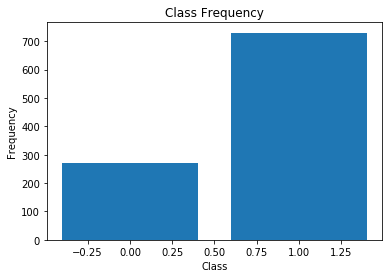

In [937]:
classes = train_valid_df['Class'].values
# print(classes)
unique, counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

For our situation, we will implement over-sampling so we avoid data loss.

In [938]:
# Class count
# count_class_1, count_class_0 = train_valid_df['Class'].value_counts()
# print(count_class_1)

# Divide by class
# df_class_1 = train_valid_df[train_valid_df['Class'] == 1]
# df_class_0 = train_valid_df[train_valid_df['Class'] == 0]

In [939]:
#train_valid_df.head()

In [940]:
# Balancing the data by resampling from the smaller class group.

# df_class_0_over = df_class_0.sample(400, replace=True)
# train_valid_df = pd.concat([df_class_1, df_class_0_over], axis=0)

# print('Random over-sampling:')
# print(train_valid_df['Class'].value_counts())

# train_valid_df['Class'].value_counts().plot(kind='bar', title='Count (target)');

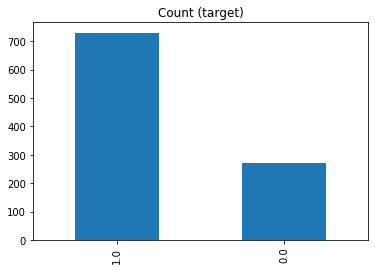

In [941]:
train_valid_df['Class'].value_counts().plot(kind='bar', title='Count (target)');

In [942]:
train_valid_df['Class'].value_counts()

1.0    730
0.0    270
Name: Class, dtype: int64

One thing to note is that it may be better to apply balancing during the cross-validation (https://www.researchgate.net/post/should_oversampling_be_done_before_or_within_cross-validation)

This might mean that the above will lead to overfitting as we are creating too many duplicates of the 1s. Also note that because we split training and valid at the start, the sample size of each training set will change depending on the ratio of 1s and 0s we take from the original data for training. Thus the size of the train_df_bal will keep changing if we do it with this method.

In [943]:
train_valid_df.shape

(1000, 65)

In [944]:
# Balancing the dataset results in the ID column reappearing in the dataset, so we will delete it again here.
# Remove ID as it does not give us any information.
# del train_valid_df['ID']

# from sklearn.utils import shuffle
# train_valid_df = shuffle(train_valid_df)

In [945]:
#train_valid_df.head()

### Why does imbalanced dataset lead to higher accuracy than balanced dataset?
Imagine that your data is not easily separable. Your classifier isn't able to do a very good job at distinguishing between positive and negative examples, so it usually predicts the majority class for any example. In the unbalanced case, it will get 100 examples correct and 20 wrong, resulting in a 100/120 = 83% accuracy. But after balancing the classes, the best possible result is about 50%.

The problem here is that accuracy is not a good measure of performance on unbalanced classes. It may be that your data is too difficult, or the capacity of your classifier is not strong enough. It's usually better to look at the confusion matrix to better understand how the classifier is working, or look at metrics other than accuracy such as the precision and recall, 𝐹1 score (which is just the harmonic mean of precision and recall), or AUC. These are typically all easy to use in common machine learning libraries like scikit-learn.

***Decided to use balanced bagging classifier instead!

## Split Features and Target

In [946]:
print("Dataset Length: ", len(train_valid_df))
print("Dataset Shape: ", train_valid_df.shape)

Dataset Length:  1000
Dataset Shape:  (1000, 65)


In [947]:
# X contains all features and y contains target
X = train_valid_df.drop(columns=['Class'],axis=1)
y = train_valid_df['Class']

In [948]:
X.shape

(1000, 64)

In [949]:
#X.head()

In [950]:
y.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: Class, dtype: float64

In [951]:
# Convert X into matrix format so cross validation function is satisfied.
X = X.values

In [952]:
# Convert y into matrix format so cross validation function is satisfied.
y = pd.DataFrame(y)
y = y.values.ravel()


# Balance Trial with SMOTE

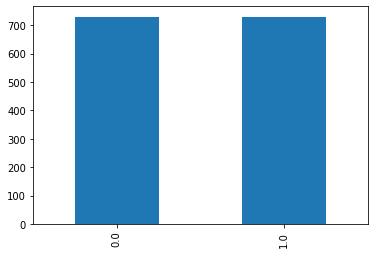

In [953]:
# TRY BALANCE THE DATASET NOW USING SMOTE
# Found that imbalanced data was similar if not better (more consistent) than balanced dataset. 
# # Also for knn, the accuracy reduced a lot (down to 0.2).

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X, y = sm.fit_sample(X, y)
pd.Series(y).value_counts().plot.bar()

Decided to use balanced bagging classifier instead!

### Perhaps don't need to balance? 
You need to deal with imbalanced data set when the value of finding the minority class is much higher than that of finding the majority.

## 3.11 Feature engineering:

### You may also come up with attributes derived from existing attributes. If this is the case, give an explanation of the new attributes that you have created.


I have already made dummy variables to make sure some of the columns which are categorical are turned into numerical values that the model can process! 

In [954]:
# Featuretools is an open source library for performing automated feature engineering. Let us try doing this now: 
# import featuretools as ft
# es = ft.EntitySet(id = 'example')
# es = es.entity_from_dataframe(entity_id = 'example', dataframe = train_valid_df, index = 'ID')

In [955]:
# View PCA below.

## 3.12 Feature/Attribute selection: 

### If applicable, clearly indicate which attributes you decide to remove in addition to those (obviously) irrelevant attributes that you have identified above and give a brief explanation why.

In [956]:
# View PCA below.

## 3.13 Data instances:

### If you decide to make changes to the data instances with class labels (this may include selecting only a subset of the data, removing instances, randomizing/reordering instances, or synthetically injecting new data instances to the training data, etc. ), provide an explanation.

Principal component analysis was performed to make sure there was no multicollinearity between variables. Dummy variables were also created prior to this to ensure that categorical variables could be read into the table.

## 3.14 PCA

In [957]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [958]:
pca = PCA(n_components=50, random_state=42)

In [959]:
df.shape

(1100, 65)

There are currently 66 attributes (mainly from the dummy variables we created before).

In [960]:
#df.head()

In [961]:
# Functions which don't contain bagging

# def knn_func(nn, listname):
#     model = KNeighborsClassifier(n_neighbors=nn)
#     model.fit(X_train, y_train)
#     predict_valid = model.predict(X_valid)
#     accuracy_valid = accuracy_score(y_valid, predict_valid)
#     print("Accuracy for KNN: ", accuracy_valid)
#     listname.append(accuracy_valid)

# def naivebayes_func(nb_list):
#     model = GaussianNB()
#     model.fit(X_train,y_train)
#     predict_valid = model.predict(X_valid)
#     accuracy_valid = accuracy_score(y_valid, predict_valid)
#     print("Accuracy for Naive Bayes: ", accuracy_valid)
#     nb_list.append(accuracy_valid)
    
# def dtree_func(dtree_list):
#     model = DecisionTreeClassifier()
#     model = model.fit(X_train,y_train)
#     predict_valid = model.predict(X_valid)
#     accuracy_valid = accuracy_score(y_valid, predict_valid)
#     print("Accuracy for Decision Tree: ", accuracy_valid)
#     dtree_list.append(accuracy_valid)

# def random_forest_func(rf_list):
#     model = RandomForestClassifier(max_depth=2)
#     model = model.fit(X_train, y_train)
#     predict_valid = model.predict(X_valid)
#     accuracy_valid = accuracy_score(y_valid, predict_valid)
#     print("Accuracy for random forest: ", accuracy_valid)
#     rf_list.append(accuracy_valid)
    
# def logreg_func(logreg_list):
#     model = LogisticRegression(solver='liblinear', multi_class='ovr')
#     model = model.fit(X_train,y_train)
#     predict_valid = model.predict(X_valid)
#     accuracy_valid = accuracy_score(y_valid, predict_valid)
#     print("Accuracy for Logistic Regression: ", accuracy_valid)
#     logreg_list.append(accuracy_valid)
    
# def lda_func(lda_list):
#     model = LinearDiscriminantAnalysis()
#     model = model.fit(X_train,y_train)
#     predict_valid = model.predict(X_valid)
#     accuracy_valid = accuracy_score(y_valid, predict_valid)
#     print("Accuracy for LDA: ", accuracy_valid, "\n")
#     lda_list.append(accuracy_valid)

In [962]:
from imblearn.ensemble import BalancedBaggingClassifier

def knn_func(nn, listname):
    model = BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=nn),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model.fit(X_train, y_train)
    predict_valid = model.predict(X_valid)
    accuracy_valid = accuracy_score(y_valid, predict_valid)
    print("Accuracy for KNN: ", accuracy_valid)
    listname.append(accuracy_valid)

def naivebayes_func(nb_list):
    model = BalancedBaggingClassifier(base_estimator=GaussianNB(),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model.fit(X_train,y_train)
    predict_valid = model.predict(X_valid)
    accuracy_valid = accuracy_score(y_valid, predict_valid)
    print("Accuracy for Naive Bayes: ", accuracy_valid)
    nb_list.append(accuracy_valid)
    
def dtree_func(dtree_list):
    model = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train,y_train)
    predict_valid = model.predict(X_valid)
    accuracy_valid = accuracy_score(y_valid, predict_valid)
    print("Accuracy for Decision Tree: ", accuracy_valid)
    dtree_list.append(accuracy_valid)

def random_forest_func(rf_list):
    model = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(max_depth=2, random_state=0),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train, y_train)
    predict_valid = model.predict(X_valid)
    accuracy_valid = accuracy_score(y_valid, predict_valid)
    print("Accuracy for Random Forest: ", accuracy_valid)
    rf_list.append(accuracy_valid)
    
def logreg_func(logreg_list):
    model = BalancedBaggingClassifier(base_estimator=LogisticRegression(solver='liblinear', multi_class='ovr'),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train,y_train)
    predict_valid = model.predict(X_valid)
    accuracy_valid = accuracy_score(y_valid, predict_valid)
    print("Accuracy for Logistic Regression: ", accuracy_valid)
    logreg_list.append(accuracy_valid)
    
def lda_func(lda_list):
    model = BalancedBaggingClassifier(base_estimator=LinearDiscriminantAnalysis(),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train,y_train)
    predict_valid = model.predict(X_valid)
    accuracy_valid = accuracy_score(y_valid, predict_valid)
    print("Accuracy for LDA: ", accuracy_valid, "\n")
    lda_list.append(accuracy_valid)

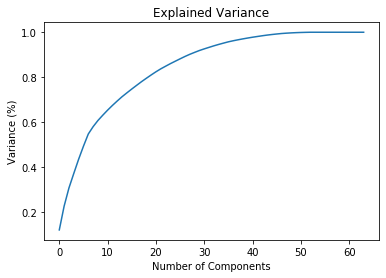

In [963]:
# Fitting the PCA algorithm with our Data
pca = PCA().fit(X)
# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [964]:
pca = PCA(n_components=50, random_state=42)

In [965]:
'''Principal component analysis first applied without cross-validation to gage the impact it has. We will now
use the same formula and regenerate pca for each cross validation later on.'''

rf = []
knn = []
nb = []
dtree = []
logreg = []
lda = []

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

#pca = PCA(n_components=50, random_state = 42)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents)
X_train = principalDf.values

principalComponents = pca.transform(X_valid)
principalDf = pd.DataFrame(data = principalComponents)
X_valid = principalDf.values

# model accuracy
#rf 
random_forest_func(rf)
# kNN
knn_func(7, knn)
# Naive Bayes
naivebayes_func(nb)
# Decision Tree
dtree_func(dtree)
# Logistic Regression
logreg_func(logreg)
# Linear Discriminant Analysis
lda_func(lda) 

Accuracy for Random Forest:  0.773972602739726
Accuracy for KNN:  0.7636986301369864
Accuracy for Naive Bayes:  0.708904109589041
Accuracy for Decision Tree:  0.7123287671232876
Accuracy for Logistic Regression:  0.8013698630136986
Accuracy for LDA:  0.8082191780821918 



## 3.15 RFE: Feature Extraction


In [966]:
# # Import your necessary dependencies
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

In [967]:
# # Feature extraction
# model = LogisticRegression()
# rfe = RFE(model, 10)
# fit = rfe.fit(X, y)
# print("Num Features: %s" % (fit.n_features_))
# print("Selected Features: %s" % (fit.support_))
# print("Feature Ranking: %s" % (fit.ranking_))

## 3.2 KNN Finding K: Trial & Error
Let us try to determine the best n-neigbours to use for KNN via trial and error. We will start with 1 and then move up by 2.

K in KNN is the number of instances that we take into account for determination of affinity with classes.

In [968]:
def knn_func(nn, listname):
    model = KNeighborsClassifier(n_neighbors=nn)
    model.fit(X_train, y_train)
    predict_valid = model.predict(X_valid)
    accuracy_valid = accuracy_score(y_valid, predict_valid)
    listname.append(accuracy_valid)

In [969]:
knn_1 = []
knn_3 = []
knn_5 = []
knn_7 = []
knn_9 = []
knn_11 = []
knn_13 = []
knn_15 = []
knn_17 = []

In [970]:
cv = StratifiedKFold(n_splits=10)
for train_index, valid_index in cv.split(X, y):
    X_train, X_valid, y_train, y_valid = X[train_index], X[valid_index], y[train_index], y[valid_index]

    #pca = PCA(n_components=50, random_state=42)
    principalComponents = pca.fit_transform(X_train)
    principalDf = pd.DataFrame(data = principalComponents)
    X_train = principalDf.values

    principalComponents = pca.transform(X_valid)
    principalDf = pd.DataFrame(data = principalComponents)
    X_valid = principalDf.values
    
    knn_func(1, knn_1)
    knn_func(3, knn_3)
    knn_func(5, knn_5)
    knn_func(7, knn_7)
    knn_func(9, knn_9)
    knn_func(11, knn_11)
    knn_func(13, knn_13)
    knn_func(15, knn_15)
    knn_func(17, knn_17)

In [971]:
[[(np.var(knn_1)), (np.var(knn_3)), (np.var(knn_5)), (np.var(knn_7)), (np.var(knn_9)), (np.var(knn_11)), (np.var(knn_13)), (np.var(knn_15)), (np.var(knn_17))]]

[[0.0040420341527491075,
  0.00285044098329893,
  0.001989116156877462,
  0.001242728466879339,
  0.0010208294239069248,
  0.0010395946706699187,
  0.001255395008444361,
  0.0011634452993056854,
  0.0009119909926815535]]

In [972]:
[[sum(knn_1)/10, sum(knn_3)/10, sum(knn_5)/10, sum(knn_7)/10, sum(knn_9)/10, 
  sum(knn_11)/10, sum(knn_13)/10, sum(knn_15)/10, sum(knn_17)/10]]

[[0.854794520547945,
  0.8068493150684933,
  0.7739726027397259,
  0.7595890410958904,
  0.7547945205479453,
  0.7410958904109589,
  0.7383561643835617,
  0.7328767123287672,
  0.7219178082191782]]

In [973]:
# random_state = 42 Isn't that obvious? 
# 42 is the Answer to the Ultimate Question of Life, the Universe, and Everything.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents)
X_train = principalDf.values

principalComponents = pca.transform(X_valid)
principalDf = pd.DataFrame(data = principalComponents)
X_valid = principalDf.values

# Credit: https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75
k_range = range(1,100)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_valid)
    scores[k] = metrics.accuracy_score(y_valid, y_pred)
    scores_list.append(metrics.accuracy_score(y_valid, y_pred))

Text(0, 0.5, 'Testing accuracy')

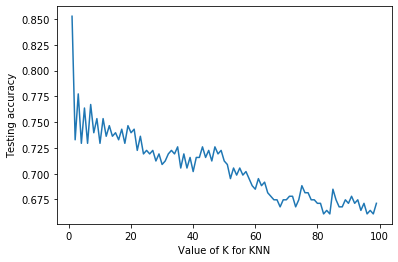

In [974]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot the relationships between K and the testing accuracy
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing accuracy')

In [975]:
# Another way to show this
# credit: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents)
X_train = principalDf.values

principalComponents = pca.transform(X_valid)
principalDf = pd.DataFrame(data = principalComponents)
X_valid = principalDf.values

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_valid)
    error.append(np.mean(pred_i != y_valid))

Text(0, 0.5, 'Mean Error')

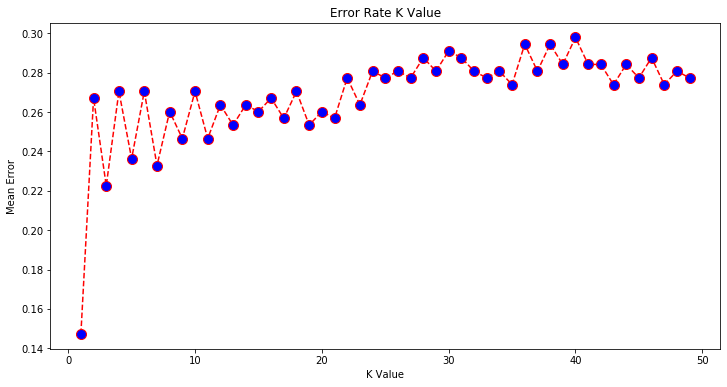

In [976]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Reference: https://stats.stackexchange.com/questions/151756/knn-1-nearest-neighbor

Notice that the Mean error is higher near 0 which makes sense because this should not be the optimal nearest neighbour.

## With Bagging:

In [977]:
from imblearn.ensemble import BalancedBaggingClassifier

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents)
X_train = principalDf.values

principalComponents = pca.transform(X_valid)
principalDf = pd.DataFrame(data = principalComponents)
X_valid = principalDf.values

error = []

# Calculating error for K values between 1 and 40

# I set replacement = True but prev it was set to False. Either way, I cannot see big diff?
for i in range(1, 80):
    model = BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=i),
                                    sampling_strategy='auto',
                                    replacement=True,
                                    random_state=42)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_valid)
    error.append(np.mean(pred_i != y_valid))

Text(0, 0.5, 'Mean Error')

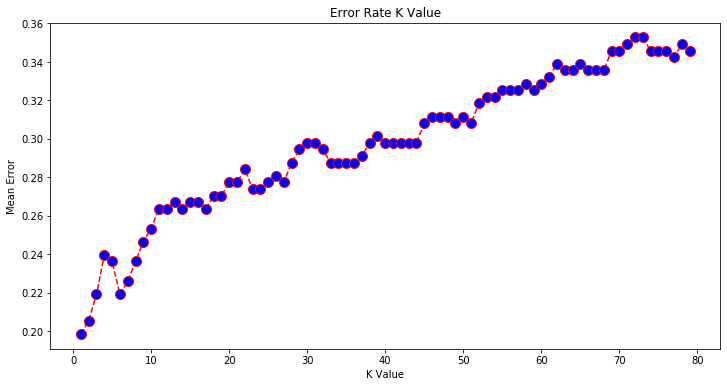

In [978]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 80), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## 3.3 Cross validation:

### How to evaluate the effectiveness of a classifier on the given data?


Effectiveness of the classifier will be assessed by using the accuracy after cross-validation. Also looking for minimal variance between the accuracies and making sure the F-score is desirable.

### How to address the issue of class imbalance in the training data?


Already achieved previously. However because fixing the imbalance lead to more error, it was decided that data balancing would not be applied. This was both by oversampling and using the SMOTE data balancing package.

### What is your choice of validation/cross-validation?


10-fold cross validation

### For each classifier that you’ve selected, what is the validation/cross-validation performance? Give an interpretation of the confusion matrix.


### For each classifier that you’ve selected, what is the estimated classification accuracy on the actual test data?

In [979]:
# def knn_func(nn, listname):
#     model = KNeighborsClassifier(n_neighbors=nn)
#     model.fit(X_train, y_train)
#     predict_valid = model.predict(X_valid)
#     accuracy_valid = accuracy_score(y_valid, predict_valid)
#     print("Accuracy for KNN: ", accuracy_valid)
#     listname.append(accuracy_valid)

# def naivebayes_func(nb_list):
#     model = GaussianNB()
#     model.fit(X_train,y_train)
#     predict_valid = model.predict(X_valid)
#     accuracy_valid = accuracy_score(y_valid, predict_valid)
#     print("Accuracy for Naive Bayes: ", accuracy_valid)
#     nb_list.append(accuracy_valid)
    
# def dtree_func(dtree_list):
#     model = DecisionTreeClassifier()
#     model = model.fit(X_train,y_train)
#     predict_valid = model.predict(X_valid)
#     accuracy_valid = accuracy_score(y_valid, predict_valid)
#     print("Accuracy for Decision Tree: ", accuracy_valid)
#     dtree_list.append(accuracy_valid)

# def random_forest_func(rf_list):
#     model = RandomForestClassifier(max_depth=2, random_state=0)
#     model = model.fit(X_train, y_train)
#     predict_valid = model.predict(X_valid)
#     accuracy_valid = accuracy_score(y_valid, predict_valid)
#     print("Accuracy for Decision Tree: ", accuracy_valid)
#     rf_list.append(accuracy_valid)
    
# def logreg_func(logreg_list):
#     model = LogisticRegression(solver='liblinear', multi_class='ovr')
#     model = model.fit(X_train,y_train)
#     predict_valid = model.predict(X_valid)
#     accuracy_valid = accuracy_score(y_valid, predict_valid)
#     print("Accuracy for Logistic Regression: ", accuracy_valid)
#     logreg_list.append(accuracy_valid)
    
# def lda_func(lda_list):
#     model = LinearDiscriminantAnalysis()
#     model = model.fit(X_train,y_train)
#     predict_valid = model.predict(X_valid)
#     accuracy_valid = accuracy_score(y_valid, predict_valid)
#     print("Accuracy for LDA: ", accuracy_valid, "\n")
#     lda_list.append(accuracy_valid)


In [980]:
## Functions for all Classification Models with bagging

def knn_func(nn, listname):
    model = BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=nn),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model.fit(X_train, y_train)
    predict_valid = model.predict(X_valid)
    accuracy_valid = accuracy_score(y_valid, predict_valid)
    print("Accuracy for KNN: ", accuracy_valid)
    listname.append(accuracy_valid)

def naivebayes_func(nb_list):
    model = BalancedBaggingClassifier(base_estimator=GaussianNB(),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model.fit(X_train,y_train)
    predict_valid = model.predict(X_valid)
    accuracy_valid = accuracy_score(y_valid, predict_valid)
    print("Accuracy for Naive Bayes: ", accuracy_valid)
    nb_list.append(accuracy_valid)
    
def dtree_func(dtree_list):
    model = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train,y_train)
    predict_valid = model.predict(X_valid)
    accuracy_valid = accuracy_score(y_valid, predict_valid)
    print("Accuracy for Decision Tree: ", accuracy_valid)
    dtree_list.append(accuracy_valid)

def random_forest_func(rf_list):
    model = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(max_depth=2, random_state=0),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train, y_train)
    predict_valid = model.predict(X_valid)
    accuracy_valid = accuracy_score(y_valid, predict_valid)
    print("Accuracy for Decision Tree: ", accuracy_valid)
    rf_list.append(accuracy_valid)
    
def logreg_func(logreg_list):
    model = BalancedBaggingClassifier(base_estimator=LogisticRegression(solver='liblinear', multi_class='ovr'),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train,y_train)
    predict_valid = model.predict(X_valid)
    accuracy_valid = accuracy_score(y_valid, predict_valid)
    print("Accuracy for Logistic Regression: ", accuracy_valid)
    logreg_list.append(accuracy_valid)
    
def lda_func(lda_list):
    model = BalancedBaggingClassifier(base_estimator=LinearDiscriminantAnalysis(),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train,y_train)
    predict_valid = model.predict(X_valid)
    accuracy_valid = accuracy_score(y_valid, predict_valid)
    print("Accuracy for LDA: ", accuracy_valid, "\n")
    lda_list.append(accuracy_valid)


cross_validation.Bootstrap is deprecated. cross_validation.KFold or cross_validation.ShuffleSplit are recommended instead.

In [981]:
knn = []
nb = []
dtree = []
logreg = []
lda = []
svm = []
rf = []

'''First I trialed the normal K fold cross validation, but then realised the stratified k-fold cross validation
worked much better with a more consistent accuracy across trials.'''

# cv = KFold(n_splits=10, random_state=20, shuffle=False)
# for train_index, valid_index in cv.split(X):
cv = StratifiedKFold(n_splits=10)
for train_index, valid_index in cv.split(X, y):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", valid_index)
    X_train, X_valid, y_train, y_valid = X[train_index], X[valid_index], y[train_index], y[valid_index]
    
    principalComponents = pca.fit_transform(X_train)
    principalDf = pd.DataFrame(data = principalComponents)
    X_train = principalDf.values

    principalComponents = pca.transform(X_valid)
    principalDf = pd.DataFrame(data = principalComponents)
    X_valid = principalDf.values

    # kNN
    knn_func(7, knn)   
    # Naive Bayes
    naivebayes_func(nb)
    # Decision Tree
    dtree_func(dtree)
    # Logistic Regression
    logreg_func(logreg)
    # Linear Discriminant Analysis
    lda_func(lda) 
    # Random Forest
    random_forest_func(rf)

Accuracy for KNN:  0.7671232876712328
Accuracy for Naive Bayes:  0.636986301369863
Accuracy for Decision Tree:  0.6986301369863014
Accuracy for Logistic Regression:  0.7534246575342466
Accuracy for LDA:  0.7534246575342466 

Accuracy for Decision Tree:  0.726027397260274
Accuracy for KNN:  0.7534246575342466
Accuracy for Naive Bayes:  0.7123287671232876
Accuracy for Decision Tree:  0.7328767123287672
Accuracy for Logistic Regression:  0.7397260273972602
Accuracy for LDA:  0.7328767123287672 

Accuracy for Decision Tree:  0.7328767123287672
Accuracy for KNN:  0.7123287671232876
Accuracy for Naive Bayes:  0.6027397260273972
Accuracy for Decision Tree:  0.6917808219178082
Accuracy for Logistic Regression:  0.726027397260274
Accuracy for LDA:  0.7328767123287672 

Accuracy for Decision Tree:  0.678082191780822
Accuracy for KNN:  0.7328767123287672
Accuracy for Naive Bayes:  0.6712328767123288
Accuracy for Decision Tree:  0.7191780821917808
Accuracy for Logistic Regression:  0.6986301369863

In [982]:
knn

[0.7671232876712328,
 0.7534246575342466,
 0.7123287671232876,
 0.7328767123287672,
 0.7876712328767124,
 0.7534246575342466,
 0.7876712328767124,
 0.7465753424657534,
 0.7808219178082192,
 0.8287671232876712]

In [983]:
nb

[0.636986301369863,
 0.7123287671232876,
 0.6027397260273972,
 0.6712328767123288,
 0.7671232876712328,
 0.8424657534246576,
 0.8287671232876712,
 0.815068493150685,
 0.7671232876712328,
 0.8013698630136986]

In [984]:
dtree

[0.6986301369863014,
 0.7328767123287672,
 0.6917808219178082,
 0.7191780821917808,
 0.7397260273972602,
 0.7534246575342466,
 0.7465753424657534,
 0.7397260273972602,
 0.7397260273972602,
 0.7671232876712328]

In [985]:
logreg

[0.7534246575342466,
 0.7397260273972602,
 0.726027397260274,
 0.6986301369863014,
 0.821917808219178,
 0.773972602739726,
 0.815068493150685,
 0.7602739726027398,
 0.7328767123287672,
 0.7876712328767124]

In [986]:
lda

[0.7534246575342466,
 0.7328767123287672,
 0.7328767123287672,
 0.7191780821917808,
 0.8082191780821918,
 0.773972602739726,
 0.7876712328767124,
 0.7602739726027398,
 0.7397260273972602,
 0.773972602739726]

In [987]:
rf

[0.726027397260274,
 0.7328767123287672,
 0.678082191780822,
 0.7534246575342466,
 0.7671232876712328,
 0.821917808219178,
 0.7945205479452054,
 0.815068493150685,
 0.7808219178082192,
 0.7945205479452054]

In [988]:
# Averages for each model
sum(knn)/10

0.7650684931506848

In [989]:
sum(nb)/10

0.7445205479452055

In [990]:
sum(dtree)/10

0.7328767123287673

Originally when oversampling to balance the dataset, the decision tree had an extremely unprecedented high accuracy of around 90%. However once we removed balancing, because it might be leading to overfitting, the dtree stayed around 74% which is very close to the accuracy that is required and also consistent with the others. Thus we decided to try bagging to let imblearn do the balancing for us but this did not work. The next solution is to do a combination of oversampling and undersampling? OR see if boosting/other bagging techniques/ can fix this issue. Also note we still have not implemented feature engineering and feature extraction which might solve the problem!

In [991]:
sum(logreg)/10

0.760958904109589

In [992]:
sum(lda)/10

0.7582191780821919

In [993]:
sum(rf)/10

0.7664383561643835

One way to improve this accuracy may be to make sure that the validation set is also balanced seeing as the training will definitely be balanced here!

## 3.31 Variance of Accuracy

In [994]:
np.var(knn)

0.0009762619628448117

In [995]:
np.var(nb)

0.006399418277350348

In [996]:
np.var(dtree)

0.0004972790392193653

In [997]:
np.var(logreg)

0.0013928504409832984

In [998]:
np.var(lda)

0.000704165884781385

In [999]:
np.var(rf)

0.0017963032463876884

## 3.32 F-Score:

In [1000]:
## Functions to predict valid class and test class for all Classification Models
'''In order to make the prediction even more accurate, we will use the whole 1000 instances to predict this time
in other words, we will not have a validation set because we have already verified that the model works beforehand.'''

# def knn_valid(nn):
#     model = KNeighborsClassifier(n_neighbors=nn)
#     model = model.fit(X_train, y_train)
#     predict_valid = model.predict(X_valid)
#     return predict_valid
    
# def naivebayes_valid():
#     model = GaussianNB()
#     model = model.fit(X_train, y_train)
#     predict_valid = model.predict(X_valid)
#     return predict_valid
    
# def dtree_valid():
#     model = DecisionTreeClassifier()
#     model = model.fit(X_train, y_train)
#     predict_valid = model.predict(X_valid)
#     return predict_valid

# def logreg_valid():
#     model = LogisticRegression(solver='liblinear', multi_class='ovr')
#     model = model.fit(X_train, y_train)
#     predict_valid = model.predict(X_valid)
#     return predict_valid
    
# def lda_valid():
#     model = LinearDiscriminantAnalysis()
#     model = model.fit(X_train,y_train)
#     predict_valid = model.predict(X_valid)
#     return predict_valid

# def lda_valid():
#     model = LinearDiscriminantAnalysis()
#     model = model.fit(X_train,y_train)
#     predict_valid = model.predict(X_valid)
#     return predict_valid

# def random_forest_valid():
#     model = RandomForestClassifier(max_depth=2, random_state=0)
#     model = model.fit(X_train, y_train)
#     predict_valid = model.predict(X_valid)
#     return predict_valid

'In order to make the prediction even more accurate, we will use the whole 1000 instances to predict this time\nin other words, we will not have a validation set because we have already verified that the model works beforehand.'

In [1001]:
def knn_valid(nn):
    model = BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=nn),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train, y_train)
    predict_valid = model.predict(X_valid)
    return predict_valid
    
def naivebayes_valid():
    model = BalancedBaggingClassifier(base_estimator=GaussianNB(),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train, y_train)
    predict_valid = model.predict(X_valid)
    return predict_valid
    
def dtree_valid():
    model = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train, y_train)
    predict_valid = model.predict(X_valid)
    return predict_valid

def random_forest_valid():
    model = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(max_depth=2, random_state=0),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train, y_train)
    predict_valid = model.predict(X_valid)
    return predict_valid
    
def logreg_valid():
    model = BalancedBaggingClassifier(base_estimator=LogisticRegression(solver='liblinear', multi_class='ovr'),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train, y_train)
    predict_valid = model.predict(X_valid)
    return predict_valid
    
def lda_valid():
    model = BalancedBaggingClassifier(base_estimator=LinearDiscriminantAnalysis(),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train,y_train)
    predict_valid = model.predict(X_valid)
    return predict_valid

In [1002]:
# kNN
knn_pred_valid = knn_valid(7)

# Naive Bayes
nb_pred_valid = naivebayes_valid()

# Decision Tree
dtree_pred_valid = dtree_valid()

# Logistic Regression
logreg_pred_valid = logreg_valid()

# Linear Discriminant Analysis
lda_pred_valid = lda_valid()

#Random Forest
rf_pred_valid = random_forest_valid()

In [1003]:
knn_pred_valid

array([1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [1004]:
nb_pred_valid

array([1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [1005]:
dtree_pred_valid

array([1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0.])

In [1006]:
logreg_pred_valid

array([1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [1007]:
lda_pred_valid 

array([1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [1008]:
rf_pred_valid

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [1009]:
y_valid

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [1010]:
from sklearn.metrics import classification_report, confusion_matrix


In [1011]:
cmtx = pd.DataFrame(
    confusion_matrix(y_valid, knn_pred_valid), 
    index=['true: 0', 'true: 1'], 
    columns=['pred: 0', 'pred: 1']
)
cmtx

,pred: 0,pred: 1
true: 0,73,0
true: 1,25,48


In [1012]:
cmtx = pd.DataFrame(
    confusion_matrix(y_valid, nb_pred_valid), 
    index=['true: 0', 'true: 1'], 
    columns=['pred: 0', 'pred: 1']
)
cmtx

,pred: 0,pred: 1
true: 0,69,4
true: 1,25,48


In [1013]:
cmtx = pd.DataFrame(
    confusion_matrix(y_valid, dtree_pred_valid), 
    index=['true: 0', 'true: 1'], 
    columns=['pred: 0', 'pred: 1']
)
cmtx

,pred: 0,pred: 1
true: 0,60,13
true: 1,21,52


In [1014]:
cmtx = pd.DataFrame(
    confusion_matrix(y_valid, logreg_pred_valid), 
    index=['true: 0', 'true: 1'], 
    columns=['pred: 0', 'pred: 1']
)
cmtx

,pred: 0,pred: 1
true: 0,59,14
true: 1,17,56


In [1015]:
cmtx = pd.DataFrame(
    confusion_matrix(y_valid, lda_pred_valid), 
    index=['true: 0', 'true: 1'], 
    columns=['pred: 0', 'pred: 1']
)
cmtx

,pred: 0,pred: 1
true: 0,61,12
true: 1,21,52


In [1016]:
cmtx = pd.DataFrame(
    confusion_matrix(y_valid, rf_pred_valid), 
    index=['true: 0', 'true: 1'], 
    columns=['pred: 0', 'pred: 1']
)
cmtx

,pred: 0,pred: 1
true: 0,61,12
true: 1,18,55


In [1017]:
print(classification_report(y_valid, knn_pred_valid))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        73
         1.0       1.00      0.66      0.79        73

    accuracy                           0.83       146
   macro avg       0.87      0.83      0.82       146
weighted avg       0.87      0.83      0.82       146



In [1018]:
print(classification_report(y_valid, nb_pred_valid))

              precision    recall  f1-score   support

         0.0       0.73      0.95      0.83        73
         1.0       0.92      0.66      0.77        73

    accuracy                           0.80       146
   macro avg       0.83      0.80      0.80       146
weighted avg       0.83      0.80      0.80       146



In [1019]:
print(classification_report(y_valid, dtree_pred_valid))

              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78        73
         1.0       0.80      0.71      0.75        73

    accuracy                           0.77       146
   macro avg       0.77      0.77      0.77       146
weighted avg       0.77      0.77      0.77       146



In [1020]:
print(classification_report(y_valid, logreg_pred_valid))

              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79        73
         1.0       0.80      0.77      0.78        73

    accuracy                           0.79       146
   macro avg       0.79      0.79      0.79       146
weighted avg       0.79      0.79      0.79       146



In [1021]:
print(classification_report(y_valid, lda_pred_valid))

              precision    recall  f1-score   support

         0.0       0.74      0.84      0.79        73
         1.0       0.81      0.71      0.76        73

    accuracy                           0.77       146
   macro avg       0.78      0.77      0.77       146
weighted avg       0.78      0.77      0.77       146



In [1022]:
print(classification_report(y_valid, rf_pred_valid))

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80        73
         1.0       0.82      0.75      0.79        73

    accuracy                           0.79       146
   macro avg       0.80      0.79      0.79       146
weighted avg       0.80      0.79      0.79       146



In [1023]:
from sklearn.metrics import f1_score

In [1024]:
f1_score(knn_pred_valid, y_valid, average='micro')

0.8287671232876712

In [1025]:
f1_score(nb_pred_valid, y_valid, average='micro')

0.8013698630136986

In [1026]:
f1_score(dtree_pred_valid, y_valid, average='micro')

0.7671232876712328

In [1027]:
f1_score(logreg_pred_valid, y_valid, average='micro')

0.7876712328767124

In [1028]:
f1_score(lda_pred_valid, y_valid, average='micro')

0.773972602739726

In [1029]:
f1_score(rf_pred_valid, y_valid, average='micro')

0.7945205479452053

## 3.4 Classifier comparison:

### Compare the classification performance between difference classifiers. You need to select at least two (2) evaluation metrics, for example F-measure and classification accuracy, when comparing them. Your comparison must take into account the variation between different runs due to cross-validation.


- F-measure
- Classification accuracy

### Based on the comparison, select the best two (2) classification schemes for final prediction. Note that the two classification schemes can be one type of classifier, but with two different parameters. Clearly indicate the final choice of parameters if they are not the default values.

Log Reg and Random Forest.

## 3.5 Prediction:

### Use the best two classification schemes that you have identified in the previous step to predict the missing class labels of the last 100 samples in the original data set.

In [1030]:
test_df = pd.read_csv('test_set.csv')

In [1031]:
test_df.head()

,Class,att15,att16,att18,att20,att21,att22,att23,att25,att26,att27,att28,att29,att30,att1_V0,att1_V1,att1_V2,att1_V3,att1_V4,att2_V1,att2_V10,att2_V2,att2_V3,att2_V4,att2_V5,att2_V6,att2_V7,att2_V8,att2_V9,att3_V1,att3_V2,att3_V3,att3_V4,att3_V5,att4_V0,att4_V1,att4_V2,att4_V3,att4_V4,att5_V1,att5_V2,att5_V3,att5_V4,att6_V1,att6_V2,att6_V3,att6_V4,att7_V1,att7_V2,att7_V3,att9_A,att9_B,att9_C,att9_D,att10_A,att10_B,att10_C,att10_D,att11_A,att11_B,att11_C,att12_A,att12_B,att12_C,att12_D
0,NaN,0,1,0.521704,-1.256168,-1.216583,0.444049,1,-0.916499,4,4,1.837500,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1,NaN,0,1,-0.664021,-0.024148,0.992102,-0.175056,1,-0.816986,3,1,-1.065613,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
2,NaN,0,1,-1.849745,0.222257,-0.730426,-2.273741,1,-0.917577,4,4,0.050151,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,NaN,0,1,0.903422,-1.256168,0.846502,0.798980,1,1.238077,4,4,-0.352290,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,NaN,0,1,-0.664021,0.715065,-1.016691,-0.717779,1,-1.538098,4,3,-1.489517,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [1032]:
# X contains all features and y contains target
X_test = test_df.drop(columns=['Class'],axis=1)
y_test = test_df['Class']

In [1033]:
#X_test.head()

In [1034]:
'''We are now going to use both the training and validation data in order to make the optimal model for the test data,
so we are reloading this dataframe and reproducing the pca analysis. 
This should theoretically make the model better at predicting the test data. Note that X contains all features 
and y contains target'''

X_train = train_valid_df.drop(columns=['Class'],axis=1)
y_train = train_valid_df['Class']

In [1035]:
#X_train.head()

In [1036]:
X.shape

(1460, 64)

In [1037]:
'''Note that pca.fit_transform was uses in the first PCA but in the test pca, 
pca.transform is used to maintain the same space for the pca (same mean and st dev).'''

principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents)
X_train = principalDf.values

principalComponents = pca.transform(X_test)
principalDf = pd.DataFrame(data = principalComponents)
X_test = principalDf.values

In [1038]:
## Functions to predict valid class and test class for all Classification Models
'''In order to make the prediction even more accurate, we will use the whole 1000 instances to predict this time
in other words, we will not have a validation set because we have already verified that the model works beforehand.'''


# def knn_test(nn):
#     model = KNeighborsClassifier(n_neighbors=nn)
#     model = model.fit(X_train, y_train)
#     predict_test = model.predict(X_test)
#     return predict_test
    
# def naivebayes_test():
#     model = GaussianNB()
#     model = model.fit(X_train, y_train)
#     predict_test = model.predict(X_test)
#     return predict_test
    
# def dtree_test():
#     model = DecisionTreeClassifier()
#     model = model.fit(X_train, y_train)
#     predict_test = model.predict(X_test)
#     return predict_test
    
# def logreg_test():
#     model = LogisticRegression(solver='liblinear', multi_class='ovr')
#     model = model.fit(X_train, y_train)
#     predict_test = model.predict(X_test)
#     return predict_test
    
# def lda_test():
#     model = LinearDiscriminantAnalysis()
#     model = model.fit(X_train,y_train)
#     predict_test = model.predict(X_test)
#     return predict_test

'In order to make the prediction even more accurate, we will use the whole 1000 instances to predict this time\nin other words, we will not have a validation set because we have already verified that the model works beforehand.'

In [1039]:
def knn_test(nn):
    model = BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=nn),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train, y_train)
    predict_test = model.predict(X_test)
    return predict_test
    
def naivebayes_test():
    model = BalancedBaggingClassifier(base_estimator=GaussianNB(),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train, y_train)
    predict_test = model.predict(X_test)
    return predict_test
    
def dtree_test():
    model = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train, y_train)
    predict_test = model.predict(X_test)
    return predict_test

def random_forest_test():
    model = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(max_depth=2, random_state=0),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train, y_train)
    predict_test = model.predict(X_test)
    return predict_test

    
def logreg_test():
    model = BalancedBaggingClassifier(base_estimator=LogisticRegression(solver='liblinear', multi_class='ovr'),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train, y_train)
    predict_test = model.predict(X_test)
    return predict_test
    
def lda_test():
    model = BalancedBaggingClassifier(base_estimator=LinearDiscriminantAnalysis(),
            sampling_strategy='auto',
            replacement=False,
            random_state=0)
    model = model.fit(X_train,y_train)
    predict_test = model.predict(X_test)
    return predict_test

In [1040]:
# kNN
knn_pred_test = knn_test(7)

# Naive Bayes
nb_pred_test = naivebayes_test()

# Decision Tree
dtree_pred_test = dtree_test()

# Logistic Regression
logreg_pred_test = logreg_test()

# Linear Discriminant Analysis
lda_pred_test = lda_test() 

# Random Forest
rf_pred_test = random_forest_test()

In [1041]:
knn_pred_test

array([1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.])

In [1042]:
nb_pred_test

array([1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])

In [1043]:
dtree_pred_test

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.])

In [1044]:
logreg_pred_test

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.])

In [1045]:
lda_pred_test

array([1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.])

In [1046]:
rf_pred_test

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.])

## A 50% Data Distribution Check!

One thing we know about the test set is that the classes are divided 50 50. Lets see if this assumptions holds for the predicted number.

In [1047]:
logreg_pred_test.sum()

52.0

In [1048]:
lda_pred_test.sum()

53.0

In [1049]:
rf_pred_test.sum()

54.0

Looking fantastic!

This finally concludes the assignment!!

### Produce a CSV file with the name predict.csv that contain your prediction in a similar format: the first column is the sample ID, the second and third columns are the predicted class labels. This file must be submitted electronically with the electronic copy of the report via Blackboard. An example of such a file is given below.
- IMPORTANT: Please ensure that your prediction is correctly formatted as required. Your marks will be deduced if your prediction file does not meet the above requirements. If your submitted file has more than 2 predictions, only the first two will be marked. No correction to the prediction is allowed after your assignment is submitted.
-  You must also indicate clearly in the report your estimated prediction accuracy. This should be based on the validation study.


In [1050]:
id_list = []
for i in range(1001, 1101):
    id_list.append(i)

In [1051]:
import csv

with open('predict.csv', 'w', newline='') as f_output:         
    csv_output = csv.writer(f_output)
    csv_output.writerow(["ID", "logReg", "randomForest"])
    csv_output.writerows(zip(id_list, logreg_pred_test, rf_pred_test))